# Example notebook in order to implement k means clustering
The K means clustering algorithm takes a set of points and clusters and assigns each point to a cluster dpending on its Euclidian distance to the centroid (think of the center of mass) of each centroid 

In [1]:
import pandas as pd
import numpy as np
# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic_Acid",
    "Ash",
    "Alcalinity_of_Ash",
    "Magnesium",
    "Total_Phenols",
    "Flavanoids",
    "Nonflavanoid_Phenols",
    "Proanthocyanins",
    "Color_Intensity",
    "Hue",
    "OD280_OD315",
    "Proline"
]

# Specify the file path
file_path = "wine/wine.data"
wine_df = pd.read_csv(file_path, header=None, names=column_names)

labels = wine_df["Class"]  # Assuming "Class" is the label column
targets = wine_df.drop(columns=["Class"])

labels = labels.values
targets = targets.values

In [2]:
import numpy as np
import pdb

def k_means_clustering(data, k, num_iterations=100):
    # Randomly initialize centroids
    
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(num_iterations):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

    return labels + 1, centroids # add 1 to labels to go from 0-2 to 1-3

# Assuming 'targets_array' contains your target data
num_clusters = 3

# Perform k-means clustering
labels_pred, centroids = k_means_clustering(targets, num_clusters)

# Display the first few cluster labels
print("Cluster Labels:")
print(labels)

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


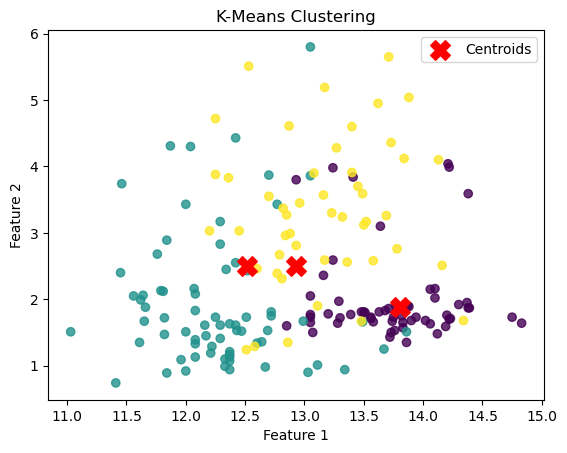

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of the data points colored by cluster labels
plt.scatter(targets[:, 0], targets[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')  # Mark centroids in red
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

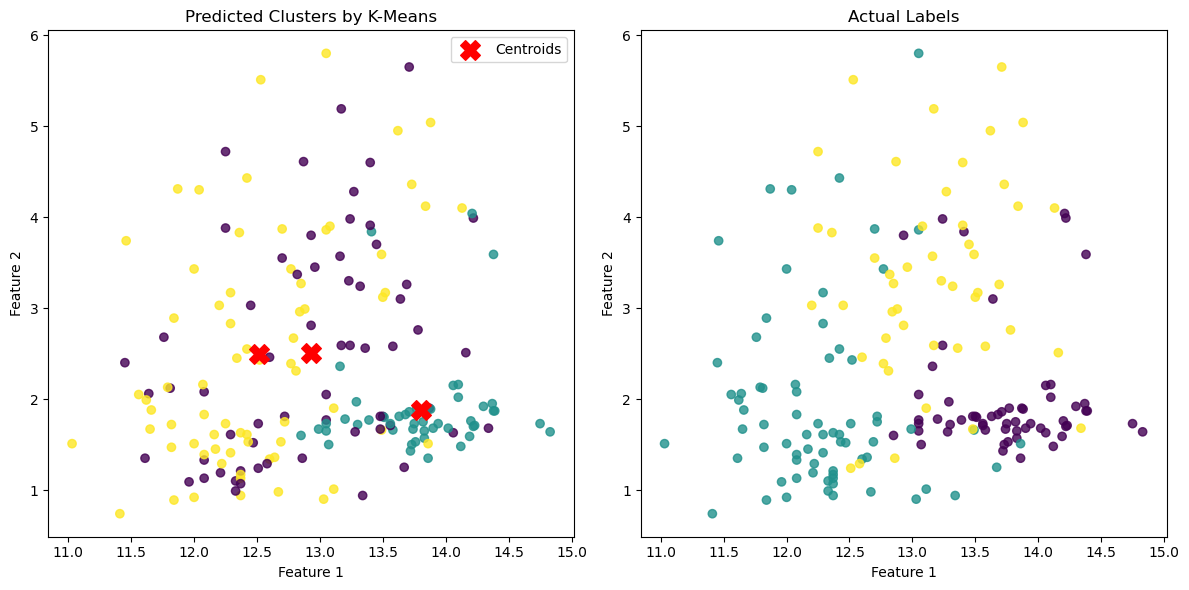

In [4]:
import matplotlib.pyplot as plt

# Assuming 'labels' contains the predicted cluster labels by k-means
# Assuming 'targets' is your target data

# Scatter plot for predicted clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(targets[:, 0], targets[:, 1], c=labels_pred, cmap='viridis', alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')  # Mark centroids in red
plt.title('Predicted Clusters by K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Scatter plot for actual labels
plt.subplot(1, 2, 2)
plt.scatter(targets[:, 0], targets[:, 1], c=labels, cmap='viridis', alpha=0.8)  # Using 'labels' for actual labels for demonstration
plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

/var/folders/8s/rqpq3_r16fjf5zzy6gp880dr0000gn/T/ipykernel_2051/1759091626.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(targets[labels_pred == label, 0], targets[labels_pred == label, 1],
/var/folders/8s/rqpq3_r16fjf5zzy6gp880dr0000gn/T/ipykernel_2051/1759091626.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(targets[labels == label, 0], targets[labels == label, 1],


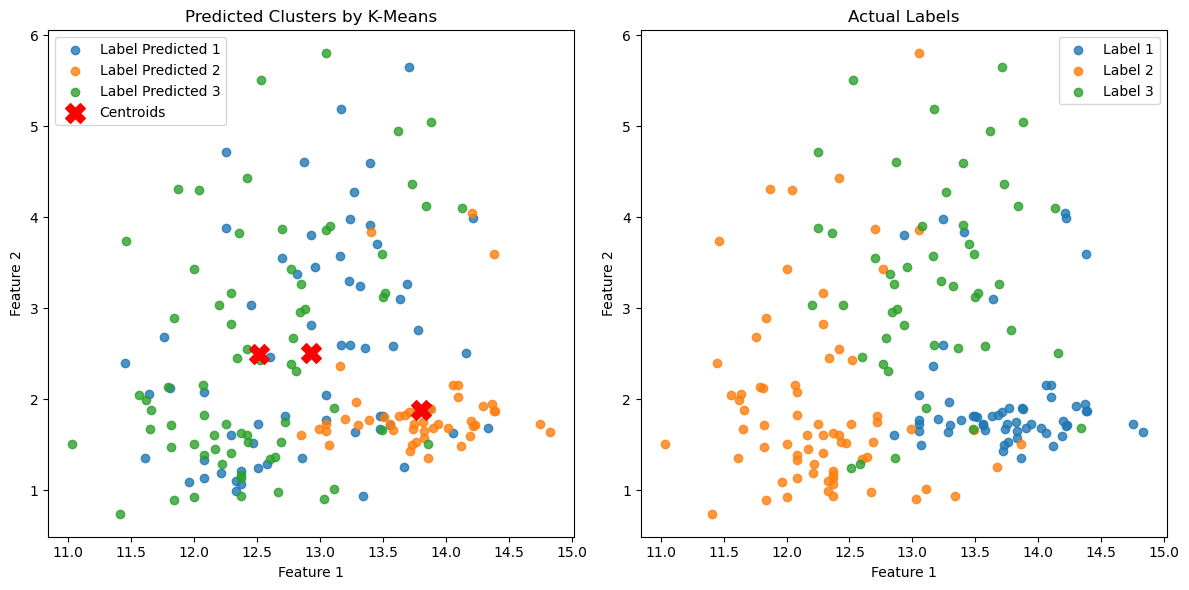

In [7]:
import matplotlib.pyplot as plt

# Assuming 'labels' contains the predicted cluster labels by k-means
# Assuming 'targets' is your target data

# Scatter plot for predicted clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for label in np.unique(labels_pred):
    plt.scatter(targets[labels_pred == label, 0], targets[labels_pred == label, 1],
                cmap='viridis', alpha=0.8, label=f'Label Predicted {label}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')  # Mark centroids in red
plt.title('Predicted Clusters by K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Scatter plot for actual labels
plt.subplot(1, 2, 2)
for label in np.unique(labels):
    plt.scatter(targets[labels == label, 0], targets[labels == label, 1],
                cmap='viridis', alpha=0.8, label=f'Label {label}')

plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()